#Fuzzy Cruize Controller
1703176

23-05-2023

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

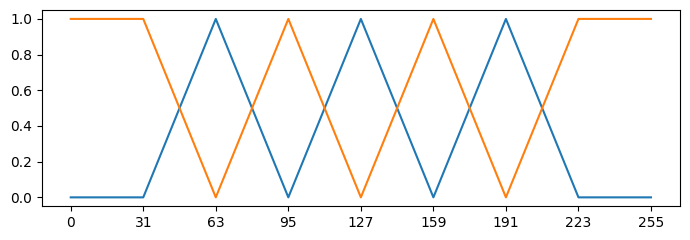

In [ ]:

#graph for input speed difference and acceleration + output throttle control
plt.rcParams["figure.figsize"] = [7.00, 2.50]
plt.rcParams["figure.autolayout"] = True

x1 = [0, 31, 63 ,95, 127, 159, 191, 223, 255]
x2 = [0, 31, 63 ,95, 127, 159, 191, 223, 255,]

y1 = [0, 0, 1, 0, 1, 0, 1, 0, 0 ]
y2 = [1, 1, 0, 1, 0, 1, 0, 1, 1]
default_x_ticks = range(len(x1))
default_x2_ticks = range(len(x2))
plt.plot(default_x_ticks, y1)
plt.plot(default_x2_ticks, y2)
plt.xticks(default_x_ticks, x1)
# plt.xticks(default_x2_ticks, x2)


plt.show()

([<matplotlib.axis.XTick at 0x7fe442636ef0>,
 [Text(0, 0, '63'), Text(1, 0, '95'), Text(2, 0, '127'), Text(3, 0, '159')])

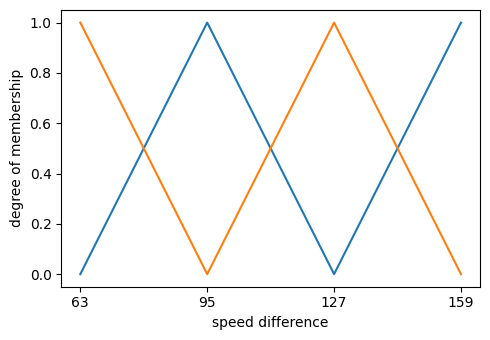

In [ ]:
spd = 100
ac = 70

#new graph spd
plt.rcParams["figure.figsize"] = [5.00, 3.50]
x1 = [63, 95, 127, 159]

y1 = [0, 1, 0, 1]
y2 = [1, 0 ,1, 0]

x_ticks = range(len(x1))
plt.plot(x_ticks, y1)
plt.plot(x_ticks, y2)
plt.xlabel("speed difference")
plt.ylabel("degree of membership")
plt.xticks(x_ticks, x1)

In [ ]:
spd = 100   #NS and ZE selected
#For NS
delta1 = spd- x1[0]
delta2 = x1[2] - spd
slope1 = slope2 = 1/(x1[1]-x1[0])

spd_dom_NS = min(1, min(delta1*slope1, delta2*slope2))
print(spd_dom_NS)

# For ZE

d1 = spd - x1[1]
d2 = x1[3] - spd
s1 = s2 = slope1

spd_dom_ZE = min(1, min(d1*s1, d2*s2))
print(spd_dom_ZE)


spd_dom_NS: -1.1935483870967742
spd_dom_ZE: -0.16129032258064516


([<matplotlib.axis.XTick at 0x7fe43fea16c0>,
 [Text(0, 0, '31'), Text(1, 0, '63'), Text(2, 0, '95'), Text(3, 0, '127')])

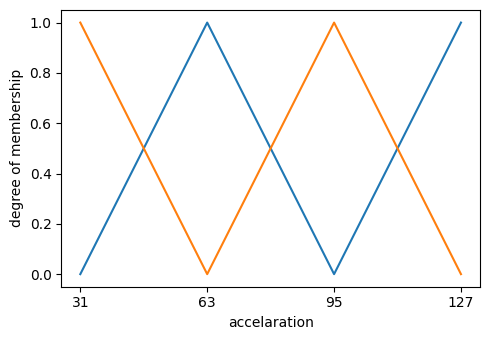

In [ ]:
#new graph ac
plt.rcParams["figure.figsize"] = [5.00, 3.50]
x1 = [31, 63, 95, 127]

y1 = [0, 1, 0, 1]
y2 = [1, 0 ,1, 0]

x_ticks = range(len(x1))
plt.plot(x_ticks, y1)
plt.plot(x_ticks, y2)
plt.xlabel("accelaration")
plt.ylabel("degree of membership")
plt.xticks(x_ticks, x1)

In [ ]:
ac = 70   #NM and NS selected
#For NM
delta1 = ac- x1[0]
delta2 = x1[2] - ac
slope1 = slope2 = 1/(x1[1]-x1[0])

ac_dom_NM = min(1, min(delta1*slope1, delta2*slope2))
print(ac_dom_NM)

# For NS

d1 = ac - x1[1]
d2 = x1[3] - ac
s1 = s2 = slope1

ac_dom_NS = min(1, min(d1*s1, d2*s2))
print(ac_dom_NS)

0.78125
0.21875


In [ ]:
spd_NL = 0
spd_NM = 0
spd_NS = spd_dom_NS
spd_ZE = spd_dom_ZE
spd_PS = 0
spd_PM = 0
spd_PL = 0

ac_NL = 0
ac_NM = ac_dom_NM
ac_NS = ac_dom_NS
ac_ZE = 0
ac_PS = 0
ac_PM = 0
ac_PL = 0

#Rule Base:

r1_PL = min(spd_NL, ac_ZE)
r2_PL = min(spd_ZE, ac_NL)
r3_PM = min(spd_NM, ac_ZE)
r4_PS = min(spd_NS, ac_PS)
r5_NS = min(spd_PS, ac_NS)
r6_NL = min(spd_PL, ac_ZE)
r7_PS = min(spd_ZE, ac_NS)
r8_PM = min(spd_ZE, ac_NM)

print(r7_PS)
print(r8_PM)

0.15625
0.15625


([<matplotlib.axis.XTick at 0x7ff45c748bb0>,
 [Text(0, 0, '127'), Text(1, 0, '159'), Text(2, 0, '191'), Text(3, 0, '223')])

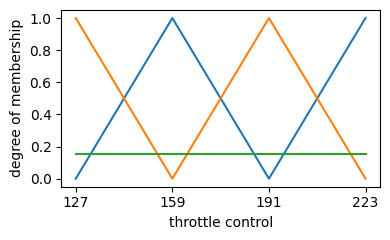

In [ ]:
#new graph output
plt.rcParams["figure.figsize"] = [4.00, 2.50]
x1 = [127, 159, 191, 223]
y1 = [0, 1, 0, 1]
y2 = [1, 0, 1, 0]
y3 = [0.15625, 0.15625, 0.15625, 0.15625]
x_ticks = range(len(x1))

plt.plot(x_ticks, y1)
plt.plot(x_ticks, y2)
plt.plot(x_ticks, y3)

plt.xlabel("throttle control")
plt.ylabel("degree of membership")
plt.xticks(x_ticks, x1)


In [ ]:
height = r7_PS = r8_PM

#Fuzzy_set_PS
cent1 = x1[1]
h = height
area1 = 0.5*h*((x1[2]-x1[0])+x1[2]-x1[0]-6)


#Fuzzy_set_PM

cent2 = x1[2]
area2 = 0.5*h*((x1[3]-x1[1])+x1[3]-x1[1]-6)

CG = (cent1*area1 + cent2*area2)/ (area1+area2)

print(CG)

175.0
